<a href="https://colab.research.google.com/github/yuliiabosher/Python-with-Data-course/blob/main/Worksheets/Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data sets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell below to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.

In [80]:
!pip install odfpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
from scipy.stats import linregress





In [81]:
df = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'LTLA_-_England', skiprows=8)
df = df.drop(df.iloc[310:].index, axis=0)
df = df.drop(0, axis=0)
df['Country'] = 'England'
df = df.rename(columns={'Lower tier local authority name': 'Local authority name'})
df = df.rename(columns={'LTLA - ONS code': 'ONS code'})
df['Scheme type'] = 'Sponsored by a member of the public'
df

,Local authority name,ONS code,Number of visa applications,Number of visas issued,Number of arrivals in the UK by sponsor location,Country,Scheme type
1,Adur,E07000223,114.0,103,90,England,Sponsored by a member of the public
2,Allerdale,E07000026,171.0,148,120,England,Sponsored by a member of the public
3,Amber Valley,E07000032,291.0,255,202,England,Sponsored by a member of the public
4,Arun,E07000224,385.0,330,275,England,Sponsored by a member of the public
5,Ashfield,E07000170,125.0,113,96,England,Sponsored by a member of the public
...,...,...,...,...,...,...,...
305,Worthing,E07000229,203.0,169,134,England,Sponsored by a member of the public
306,Wychavon,E07000238,530.0,451,387,England,Sponsored by a member of the public
307,Wyre,E07000128,131.0,122,108,England,Sponsored by a member of the public
308,Wyre Forest,E07000239,162.0,133,109,England,Sponsored by a member of the public


In [82]:
df2 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Scotland', skiprows=10)
df2 = df2.drop(0, axis=0)
df2['Country'] = 'Scotland'
df2 = df2.drop(df2.loc[33:37].index, axis=0)
df2 = df2.drop(df2.loc[39:].index, axis=0)
df2 = df2.rename(columns={'Upper tier local authority name': 'Local authority name'})
df2['Scheme type'] = 'Sponsored by a member of the public'
df2['Scheme type'][38] ='Sponsored by a devolved government'
df2

,Local authority name,ONS code,Number of visa applications,Number of visas issued,Number of arrivals in the UK by sponsor location,Country,Scheme type
1,Aberdeen City,S12000033,330,227,180,Scotland,Sponsored by a member of the public
2,Aberdeenshire,S12000034,437,348,286,Scotland,Sponsored by a member of the public
3,Angus,S12000041,324,268,225,Scotland,Sponsored by a member of the public
4,Argyll and Bute,S12000035,256,210,150,Scotland,Sponsored by a member of the public
5,City of Edinburgh,S12000036,1043,848,705,Scotland,Sponsored by a member of the public
6,Clackmannanshire,S12000005,67,64,54,Scotland,Sponsored by a member of the public
7,Dumfries and Galloway,S12000006,297,240,170,Scotland,Sponsored by a member of the public
8,Dundee City,S12000042,147,111,95,Scotland,Sponsored by a member of the public
9,East Ayrshire,S12000008,103,92,69,Scotland,Sponsored by a member of the public
10,East Dunbartonshire,S12000045,115,94,82,Scotland,Sponsored by a member of the public


In [83]:
df3 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Wales', skiprows=10)
df3 = df3.drop(0, axis=0)
df3 = df3.drop(df3.loc[22:27].index, axis=0)
df3 = df3.drop(df3.loc[29:].index, axis=0)
df3['Country'] = 'Wales'
df3 = df3.rename(columns={'Upper tier local authority name': 'Local authority name'})
df3['Scheme type'] = 'Sponsored by a member of the public'
df3['Scheme type'][28] = 'Sponsored by a devolved government'
df3

,Local authority name,ONS code,Number of visa applications,Number of visas issued,Number of arrivals in the UK by sponsor location,Country,Scheme type
1,Blaenau Gwent,W06000019,37,35,33,Wales,Sponsored by a member of the public
2,Bridgend,W06000013,303,249,200,Wales,Sponsored by a member of the public
3,Caerphilly,W06000018,156,128,103,Wales,Sponsored by a member of the public
4,Cardiff,W06000015,561,431,372,Wales,Sponsored by a member of the public
5,Carmarthenshire,W06000010,399,332,281,Wales,Sponsored by a member of the public
6,Ceredigion,W06000008,189,150,115,Wales,Sponsored by a member of the public
7,Conwy,W06000003,194,156,139,Wales,Sponsored by a member of the public
8,Denbighshire,W06000004,156,136,121,Wales,Sponsored by a member of the public
9,Flintshire,W06000005,223,185,132,Wales,Sponsored by a member of the public
10,Gwynedd,W06000002,321,263,224,Wales,Sponsored by a member of the public


In [84]:
df4 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Northern_Ireland', skiprows=8)
df4 = df4.drop(0, axis=0)
df4 = df4.drop(df4.loc[12:].index, axis=0)
df4['Country'] = 'Northern Ireland'
df4 = df4.rename(columns={'Numbers of visa applications': 'Number of visa applications'})
df4['Scheme type'] = 'Sponsored by a member of the public'
df4

,Local authority name,ONS code,Number of visa applications,Number of visas issued,Number of arrivals in the UK by sponsor location,Country,Scheme type
1,Antrim and Newtownabbey,N09000001,175.0,143.0,80.0,Northern Ireland,Sponsored by a member of the public
2,Ards and North Down,N09000011,275.0,233.0,132.0,Northern Ireland,Sponsored by a member of the public
3,"Armagh City, Banbridge and Craigavon",N09000002,485.0,335.0,157.0,Northern Ireland,Sponsored by a member of the public
4,Belfast,N09000003,384.0,323.0,180.0,Northern Ireland,Sponsored by a member of the public
5,Causeway Coast and Glens,N09000004,219.0,175.0,101.0,Northern Ireland,Sponsored by a member of the public
6,Derry City and Strabane,N09000005,171.0,134.0,62.0,Northern Ireland,Sponsored by a member of the public
7,Fermanagh and Omagh,N09000006,196.0,105.0,42.0,Northern Ireland,Sponsored by a member of the public
8,Lisburn and Castlereagh,N09000007,242.0,192.0,101.0,Northern Ireland,Sponsored by a member of the public
9,Mid and East Antrim,N09000008,244.0,216.0,116.0,Northern Ireland,Sponsored by a member of the public
10,Mid Ulster,N09000009,360.0,268.0,149.0,Northern Ireland,Sponsored by a member of the public


In [85]:
uk = pd.concat([df, df2, df3, df4], ignore_index=True)
def asterisk(x):
  if x == '*':
    return 0
  else:
    return x

uk['Number of arrivals in the UK by sponsor location'] = uk['Number of arrivals in the UK by sponsor location'].apply(asterisk)
uk['Number of visas issued'] = uk['Number of visas issued'].apply(asterisk)
uk['Number of visa applications'] = uk['Number of visa applications'].apply(asterisk)
uk['Number of visa applications'] = uk['Number of visa applications'].astype(int)
uk['Number of visas issued'] = uk['Number of visas issued'].astype(int)
uk['Number of arrivals in the UK by sponsor location'] = uk['Number of arrivals in the UK by sponsor location'].astype(int)
uk = uk.rename(columns = {'Number of visa applications': 'Applications', 'Number of visas issued': 'Visas', 'Number of arrivals in the UK by sponsor location': 'Arrivals'})


Text(0, 0.5, 'Country')

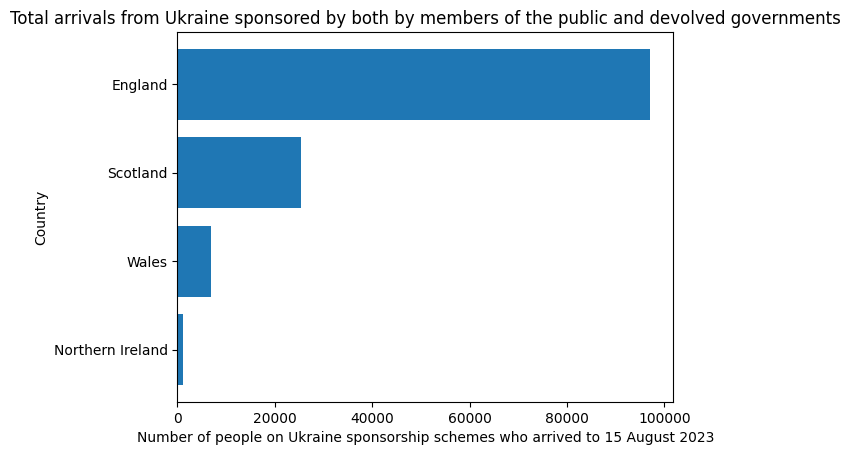

In [86]:
country_total = uk.groupby('Country').sum(numeric_only = False).sort_values("Arrivals")
data = country_total['Arrivals']
labels = data.keys()
plt.barh(labels, data)
plt.title("Total arrivals from Ukraine sponsored by both by members of the public and devolved governments")
plt.xlabel("Number of people on Ukraine sponsorship schemes who arrived to 15 August 2023")
plt.ylabel("Country")

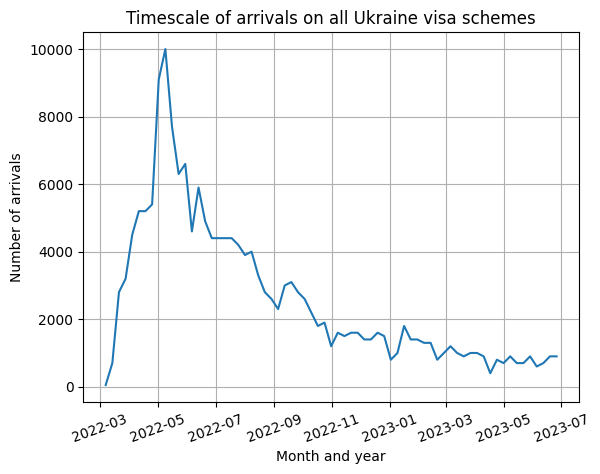

In [87]:
family = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods", sheet_name = "UVS_03", skiprows=1)
family = family.drop(family.iloc[69:].index, axis=0)
def less_50(x):
  if x['Ukraine Family Scheme Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Ukraine Family Scheme Arrivals']
family['Ukraine Family Scheme Arrivals'] = family.apply(less_50, axis=1)
def z(x):
  if x['Ukraine Sponsorship Scheme Arrivals'] == 'z':
    return 0
  else:
    return x['Ukraine Sponsorship Scheme Arrivals']
family['Ukraine Sponsorship Scheme Arrivals'] = family.apply(z, axis=1)
def total(x):
  if x['Total Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Total Arrivals']
family['Total Arrivals'] = family.apply(total, axis=1)
family['Week Ending'] = pd.to_datetime(family['Week Ending'])
family_scheme_total = family['Ukraine Family Scheme Arrivals'].sum()
new_row = ['n/a', None, 'n/a', 'n/a', family_scheme_total, 'n/a', 'Sponsored by a family member']
uk.loc[len(uk)] = new_row
total_arrivals = family['Total Arrivals']
week = family['Week Ending']
plt.plot(week, total_arrivals)
plt.xticks(rotation = 20)
plt.title('Timescale of arrivals on all Ukraine visa schemes')
plt.xlabel('Month and year')
plt.ylabel('Number of arrivals')
plt.grid()


Text(0.5, 1.0, 'Arrivals from Ukraine by the visa scheme type')

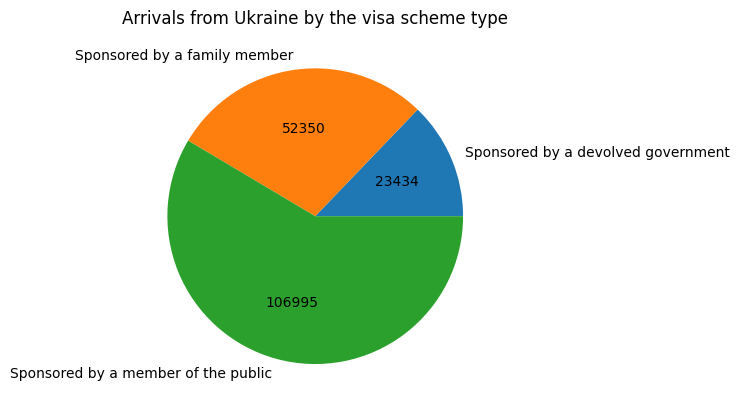

In [88]:
scheme_total = uk.groupby('Scheme type').sum(numeric_only = True).sort_values('Arrivals')
data_scheme = scheme_total['Arrivals']
labels_scheme = data_scheme.keys()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{v}'.format(v=val)
        return my_format
plt.pie(data_scheme, labels = labels_scheme, autopct = autopct_format(data_scheme))
plt.title("Arrivals from Ukraine by the visa scheme type")


Text(0, 0.5, 'Number of local authorities')

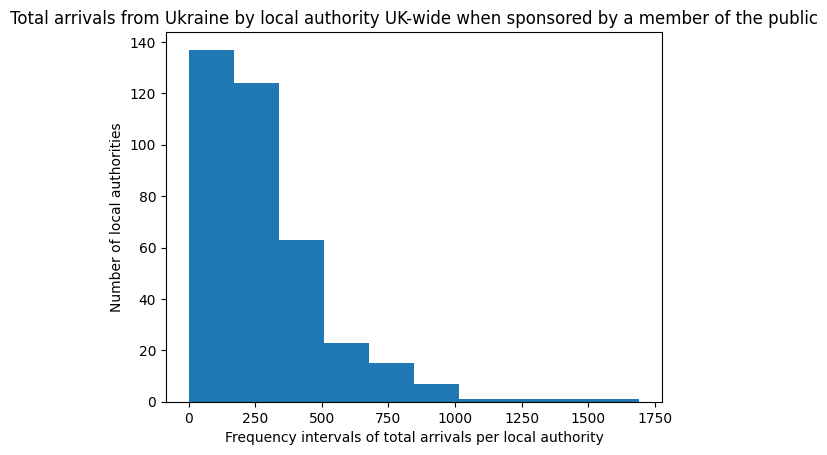

In [89]:
members_of_public = uk.dropna(subset = 'ONS code')
plt.hist(members_of_public['Arrivals'])
plt.title('Total arrivals from Ukraine by local authority UK-wide when sponsored by a member of the public')
plt.xlabel('Frequency intervals of total arrivals per local authority')
plt.ylabel('Number of local authorities')

Text(0.5, 1.0, 'Northern Ireland')

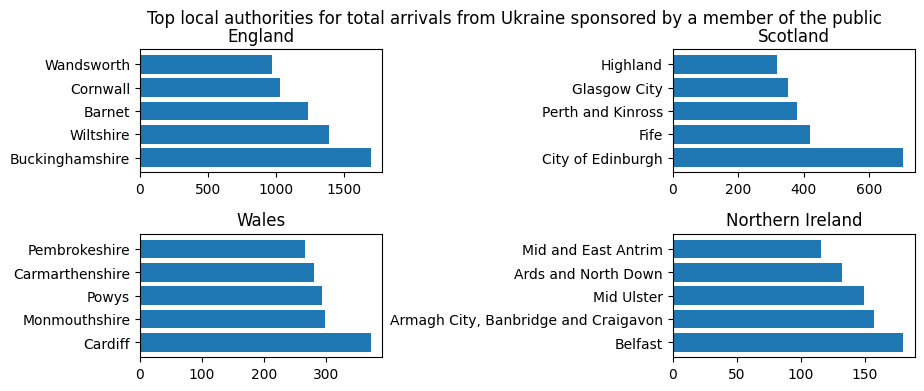

In [90]:
fig, axs = plt.subplots(2, 2, figsize = (10,4))
fig.subplots_adjust(hspace = 0.5, wspace=1.2)
fig.suptitle('Top local authorities for total arrivals from Ukraine sponsored by a member of the public')
x1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Arrivals']
axs[0, 0].barh(x1, y1)
axs[0, 0].set_title('England')
x2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
axs[0,1].barh(x2, y2)
axs[0,1].set_title('Scotland')
x3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Arrivals']
axs[1,0].barh(x3,y3)
axs[1,0].set_title('Wales')
x4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
axs[1,1].barh(x4,y4)
axs[1,1].set_title('Northern Ireland')


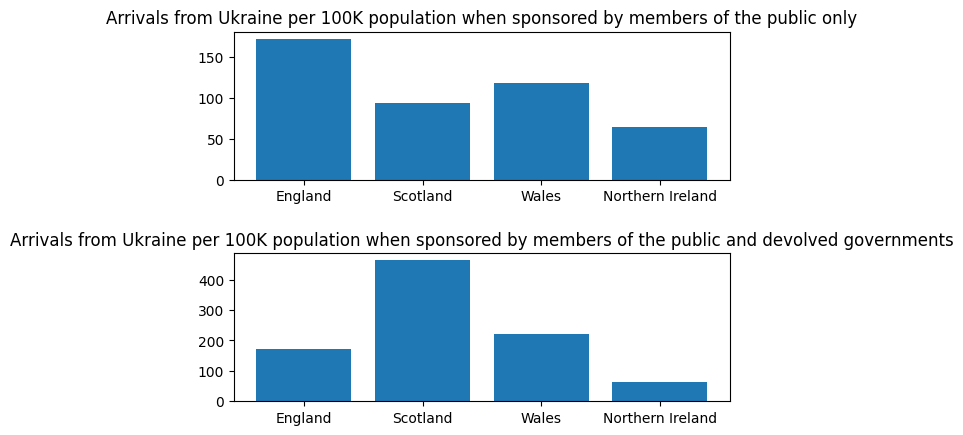

In [91]:
population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE1')
population = population.drop('Unnamed: 1', axis=1)
population = population.drop('MYE1: Population estimates: Summary for the UK, mid-2021', axis=1)
population = population.drop('Unnamed: 2', axis=1)
population = population.drop('Unnamed: 3', axis=1)
population.columns = population.iloc[5]
population = population.drop(population.loc[:6].index, axis=0)
population = population.drop(population.loc[8:].index, axis=0)
population
country_total
country_per_100K = {
    'England': [round(country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland':[round(country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
country_per_100K
country_100K_df = pd.DataFrame(country_per_100K)
pm_country_total = members_of_public.groupby('Country').sum(numeric_only=True)
pm_country_100K = {
    'England': [round(pm_country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland': [round(pm_country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(pm_country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(pm_country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
pm_country_100K_df = pd.DataFrame(pm_country_100K)
fig, axs = plt.subplots(2)
axs[0].bar(pm_country_100K_df.keys(), pm_country_100K_df.iloc[0])
axs[0].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public only')
axs[1].bar(country_100K_df.keys(), country_100K_df.iloc[0])
axs[1].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public and devolved governments')
fig.subplots_adjust(hspace=0.5)


Text(0.5, 1.0, 'Northern Ireland')

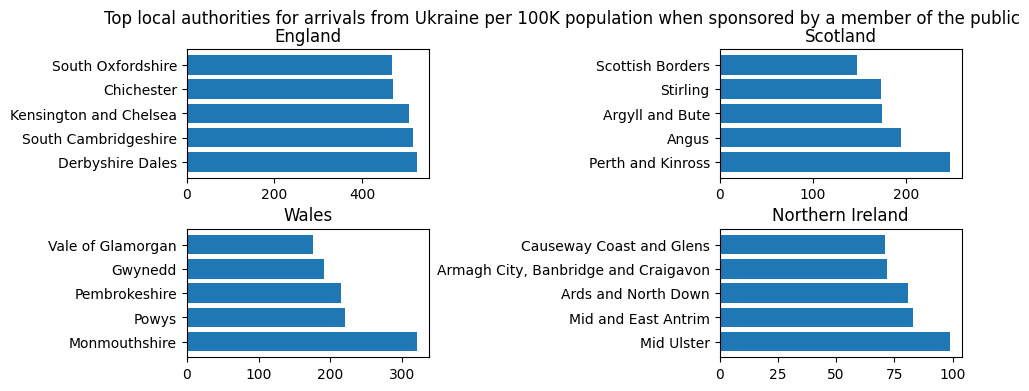

In [92]:
county_population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE2 - Persons', skiprows=7)
county_df = county_population[['Code', 'All ages']]
county_df = county_df.rename(columns={'Code': 'ONS code'})
county_joined = members_of_public.join(county_df.set_index('ONS code'), on='ONS code', how='inner')
county_joined = county_joined.rename(columns={'All ages': 'Population'})
county_joined['Arrivals per 100K'] = round(county_joined['Arrivals']/county_joined['Population']*100000).astype(int)
xe = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ye = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xs = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ys = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
fig, axs = plt.subplots(2,2, figsize=(10,4))
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle('Top local authorities for arrivals from Ukraine per 100K population when sponsored by a member of the public')
axs[0,0].barh(xe, ye)
axs[0,0].set_title('England')
axs[0,1].barh(xs, ys)
axs[0,1].set_title('Scotland')
axs[1,0].barh(xw, yw)
axs[1,0].set_title('Wales')
axs[1,1].barh(xi, yi)
axs[1,1].set_title('Northern Ireland')


Text(0.5, 1.0, 'Northern Ireland')

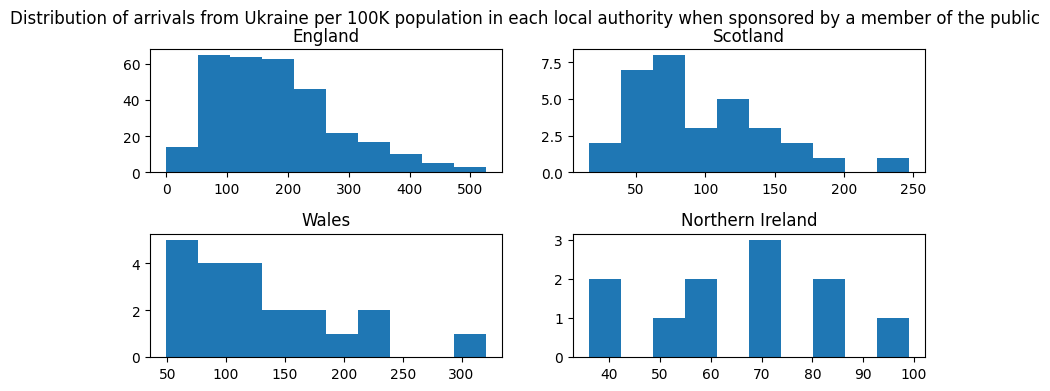

In [93]:
e = county_joined[county_joined['Country'] == 'England']['Arrivals per 100K']
s = county_joined[county_joined['Country'] == 'Scotland']['Arrivals per 100K']
w = county_joined[county_joined['Country'] == 'Wales']['Arrivals per 100K']
i = county_joined[county_joined['Country'] == 'Northern Ireland']['Arrivals per 100K']
fig, axs = plt.subplots(2, 2, figsize= (10,4))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of arrivals from Ukraine per 100K population in each local authority when sponsored by a member of the public')
axs[0,0].hist(e)
axs[0,0].set_title('England')
axs[0,1].hist(s)
axs[0,1].set_title('Scotland')
axs[1,0].hist(w)
axs[1,0].set_title('Wales')
axs[1,1].hist(i)
axs[1,1].set_title('Northern Ireland')


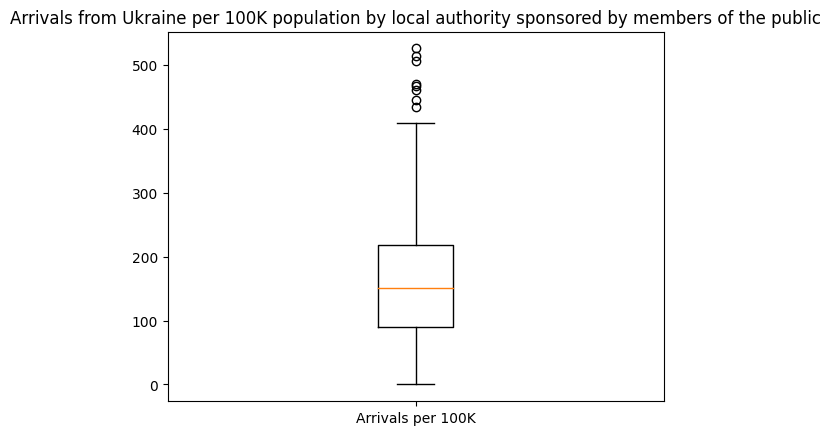

In [94]:
plt.boxplot(county_joined['Arrivals per 100K'], labels=['Arrivals per 100K'])
plt.title('Arrivals from Ukraine per 100K population by local authority sponsored by members of the public')
plt.show()

Text(0.5, 1.0, 'Income deprivation vs arrivals from Ukraine per 100K population sponsored by members of the public in England')

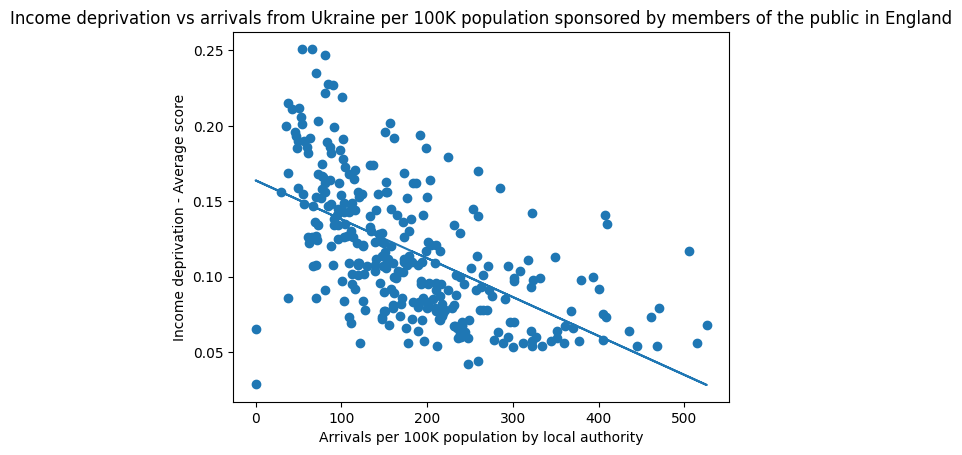

In [95]:
deprivation_e = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/localincomedeprivationdata.xlsx', sheet_name='Local authorities')
deprivation_e = deprivation_e.rename(columns = {'Local Authority District code (2019)': 'ONS code'})
deprivation_e = county_joined.join(deprivation_e.set_index('ONS code'), on ='ONS code', how='inner')
ave_score = deprivation_e['Income deprivation- Average score ']
arrivals_100K = deprivation_e['Arrivals per 100K']
plt.scatter(arrivals_100K, ave_score)
plt.ylabel('Income deprivation - Average score')
plt.xlabel('Arrivals per 100K population by local authority')
r = linregress(arrivals_100K, ave_score)
s = r.slope
inter = r.intercept
plt.plot(arrivals_100K, s*arrivals_100K+inter)
plt.title('Income deprivation vs arrivals from Ukraine per 100K population sponsored by members of the public in England')

In [107]:
eu_population = pd.read_csv('https://raw.githubusercontent.com/yuliiabosher/Python-with-Data-course/main/Population-by-country-2023.csv')
ukr_in_eu = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/migr_asytpsm_page_spreadsheet.xlsx', sheet_name = 'Sheet 1', skiprows=10)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[29:].index)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[:1].index)
ukr_in_eu = ukr_in_eu.rename(columns = {'TIME': 'Country', '2023-05': 'Arrivals from Ukraine'})
ukr_in_eu = ukr_in_eu[['Country', 'Arrivals from Ukraine']]
ukr_in_eu['Arrivals from Ukraine'] = ukr_in_eu['Arrivals from Ukraine'].astype(int)
eu_population = eu_population.rename(columns = {'Population on 1 January - total': 'Population', 'Category': 'Country'})
ukr_eu = eu_population.join(ukr_in_eu.set_index('Country'), on='Country')
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine']/ukr_eu['Population']*100000
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine per 100K'].astype(int)




/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


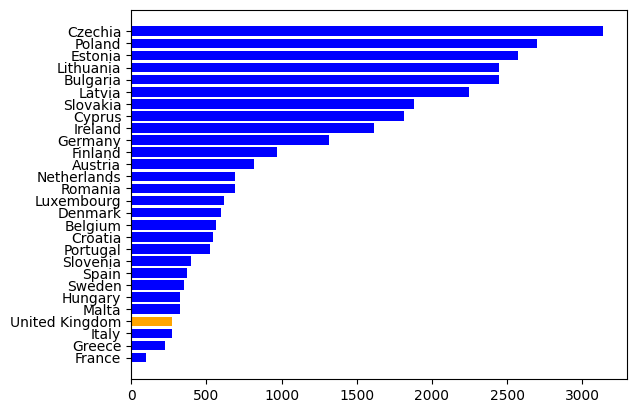

In [134]:
uk_100K = int(uk['Arrivals'].sum()/county_joined['Population'].sum()*100000)
uk_row = {'Country': ['United Kingdom'], 'Population': [county_joined['Population'].sum()], 'Arrivals from Ukraine': [uk['Arrivals'].sum()], 'Arrivals from Ukraine per 100K': [uk_100K]}
uk_row_df = pd.DataFrame(uk_row)
uk_eu = pd.concat([ukr_eu, uk_row_df], ignore_index=True)
uk_eu1 = uk_eu.sort_values('Arrivals from Ukraine per 100K')
for n,i in uk_eu1.iterrows():
  if i["Country"] == "United Kingdom":
    plt.barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='orange')
  else:
    plt.barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='blue')






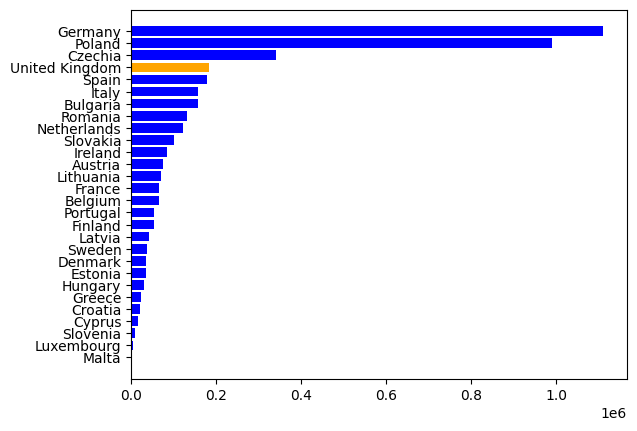

In [136]:
uk_eu2 = uk_eu.sort_values('Arrivals from Ukraine')
for n,i in uk_eu2.iterrows():
  if i["Country"] == "United Kingdom":
    plt.barh(i['Country'], i['Arrivals from Ukraine'], color='orange')
  else:
    plt.barh(i['Country'], i['Arrivals from Ukraine'], color='blue')
